In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import time

In [2]:
# x is the input variable (size m^2 & time it takes to get into the city centre)
# 10 for inputs and 1000 for outputs division is necessary to avoid overflow errors
start = time.time()

x_train = np.array([[4.6,5.2,6.3,4.6,8.9,1.2,12,3.1,8],[2.4,2.7,1.3,2.8,6,7,8,1,2]])
# y is the output (rent/month in DKK)
y_train = np.array([9.905,11,10.9,11.2,15,18,20,25,10])


x_plot = x_train*10
y_plot = y_train*1000

In [3]:
# Dimensions of input matrix
# Transposed, as this is the format we conventionally think of input
print(f"Dimensions of X: {np.transpose((x_train)).shape}")

m = x_train[0].shape[0] #training examples
n = x_train.shape[0] #features
print(f"Our input has {m} training examples and {n} features.")

Dimensions of X: (9, 2)
Our input has 9 training examples and 2 features.


In [4]:
# Function to calculate cost ( = error of model)

def compute_cost(x, y, theta, b):

    total_cost = 0
    
    for i in range(m): # looping through training examples
        h_x = 0 #prediction for one training example
        for k in range(n): #looping thorugh features
            h_x += theta[k]*x[k][i]

        h_x += b
        total_cost += ((h_x - y[i]) ** 2)

    total_cost /= (2*m)
    
    return total_cost

In [5]:
# Calculating accuracy based on parameters. For testing purposes.
# Remember to update in case of adding features
theta = [1.32,1.44]
b = 0.6
print(f"The cost of our own prediction: {compute_cost(x_train,y_train,theta,b):.2f}")

The cost of our own prediction: 28.05


In [6]:
# To find optimum point, we firstly have to find gradient

def compute_gradient(x, y, theta, b):

    # partial derivatives
    dj_dtheta = np.zeros(n,dtype=np.longdouble) 
    dj_db = 0

    for i in range(m): 
        h_x = 0
        for k in range(n): #calculating prediction for one training example
            h_x += theta[k]*x[k][i]
            
        h_x += b
        for l in range(n): # another loop through features to calculate dJ / dTheta_j, where j a feature
            dj_dtheta[l] += (h_x - y[i]) * x[l][i]
            
        dj_db += h_x - y[i]
            
 
    dj_dtheta = dj_dtheta / m
    dj_db /= m
    
    return dj_dtheta, dj_db

In [7]:
def gradient_descent(x, y, theta_in, b_in, alpha, iters):
    
    # Cost history for later visualization
    cost_history = []

    # Each iteration updates the parameters
    for i in range(iters):
        dj_dtheta, dj_db = compute_gradient(x,y,theta_in,b_in)

        theta_in -= alpha*dj_dtheta
        b_in -= alpha*dj_db

        # Creating cost history but avoiding too much data
        if i < 100000:
            cost_history.append(compute_cost(x,y,theta_in,b_in))
        
    return theta_in, b_in, cost_history

In [8]:
# initialize parameters
theta_init = np.zeros(n)
b_init = 0
# setting gradient descent iteration & step size
iterations = 1000
it_array = np.arange(0,iterations)
tmp_alpha = 1.2e-2
# run gradient descent
theta_final, b_final, J_hist = gradient_descent(x_train ,y_train, theta_init, b_init, tmp_alpha, iterations)
print(f"(theta,b) found by gradient descent: ({theta_final},{b_final:8.4f})")
print(f"Our final cost: {J_hist[iterations-1]}")

# Get time of algorithm execution
end = time.time()
execution = end-start
print(f"Execution time: {execution}")

(theta,b) found by gradient descent: ([-0.19449173  0.9416916 ], 11.9660)
Our final cost: 11.152883513616006
Execution time: 0.06442713737487793


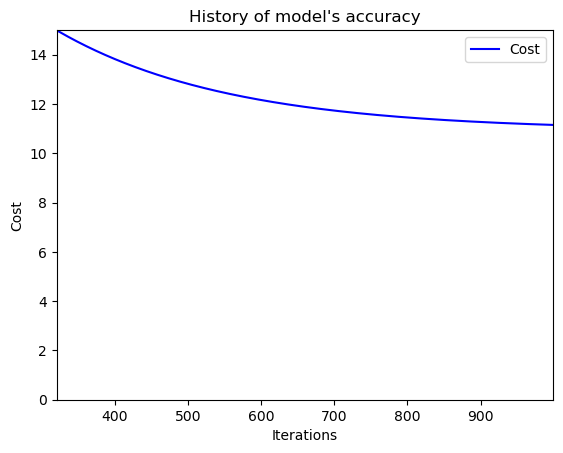

In [9]:
# Plotting cost history
# Set max cost we are satisifed with
max_cost = 15
# First index where cost reaches our value
treshold = np.where(np.array(J_hist) <= max_cost)[0][0]

plt.plot(it_array, J_hist, linestyle='-', color='blue', label='Cost')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("History of model's accuracy")

plt.xlim(left=treshold,right=iterations-1)
plt.ylim(0,max_cost)

plt.legend()
plt.show()

In [ ]:
# Testing our model
size_test = int(input("Size in m^2 of apartment: "))
size_test /= 10
time_test = int(input("Minutes to get into centre: "))
time_test /= 10

array_test = np.array([size_test, time_test])

In [ ]:
price_predicted = 0
for e in range(n):
    price_predicted += array_test[e]*theta_final[e]
price_predicted += b_final
print(f"Predicted rent for given apartment: {(price_predicted*1000):.2f} DKK")